In [1]:
#import package
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
# Load data
housing_data = pd.read_csv('housing.data', delimiter='\s+',
                      names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B','LSTAT', 'MEDV']) 

In [3]:
#Check data
housing_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
#Check data type
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#Change data type of dummy variable 
housing_data['CHAS'] = housing_data['CHAS'].astype(object)

In [6]:
#Summary basic statistical details 
housing_data.describe().to_csv('result\data_describe.csv')

In [7]:
#Check missing value
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
#Get category variable
category_variable = [col for col in housing_data.columns if housing_data[col].dtypes == 'object']

In [9]:
#Get target variable
target_variable = housing_data.columns[len(housing_data.columns)-1]

In [10]:
#Get numeric variable
numeric_variable = list(set(housing_data.columns)-set(category_variable)-set(target_variable))

In [11]:
def figure_analysis(figure_data, target_data, type):
    col = figure_data.name
    if type == 'category' :
        fig = plt.figure()
        figure_data.value_counts().plot(kind='bar')
        plt.savefig('graph\{0}.png'.format(col))
    elif type == 'numeric' :
        fig = plt.figure()
        ax1 = plt.subplot(1,2,1)
        sns.distplot(figure_data.loc[figure_data.notnull()])
        plt.title(col)
        ax2 = plt.subplot(1,2,2)
        sns.boxplot(data=figure_data)
        plt.title(col)
        plt.savefig('graph\{0}.png'.format(col))
        fig = plt.figure()
        sns.jointplot(x=col, y='MEDV', data=pd.concat([housing_data[col],housing_data[target_data.name]],axis=1), kind='scatter')
        plt.title(col)
        plt.savefig('graph\{0}_scatter.png'.format(col))

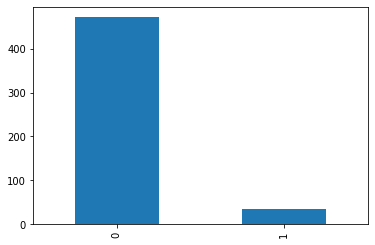

In [12]:
#Figure category variable
for col in category_variable:
    figure_analysis(housing_data[col],housing_data[target_variable], 'category')

C:\Users\stdrf\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
C:\Users\stdrf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\stdrf\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

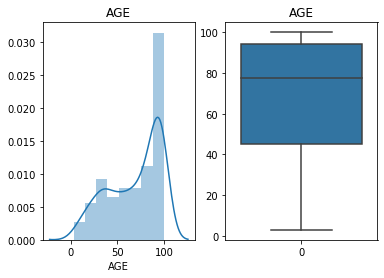

<Figure size 432x288 with 0 Axes>

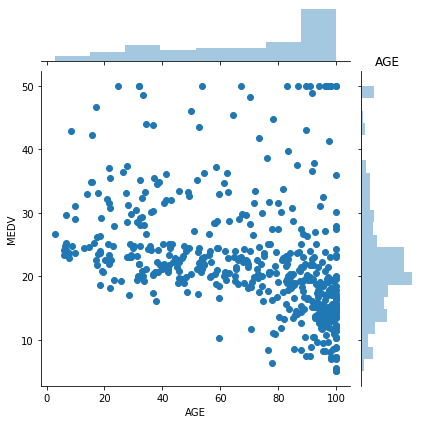

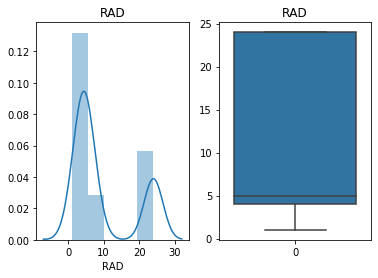

<Figure size 432x288 with 0 Axes>

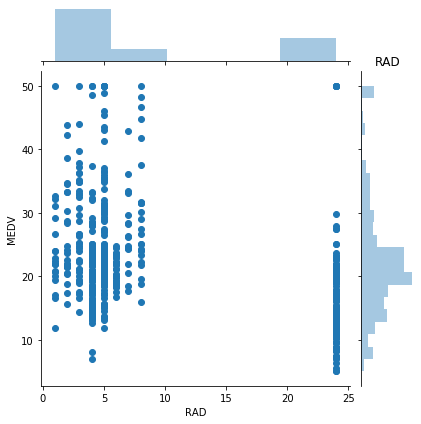

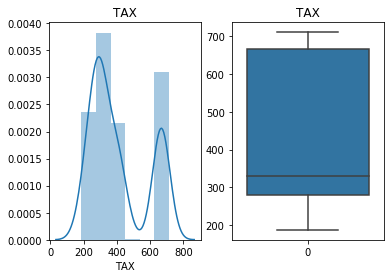

<Figure size 432x288 with 0 Axes>

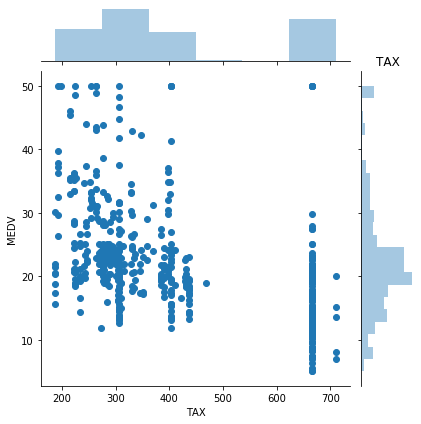

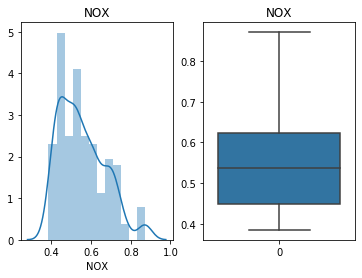

<Figure size 432x288 with 0 Axes>

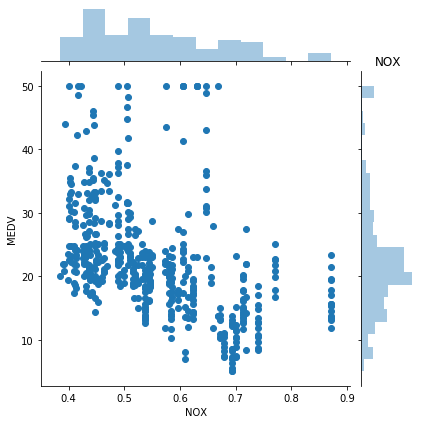

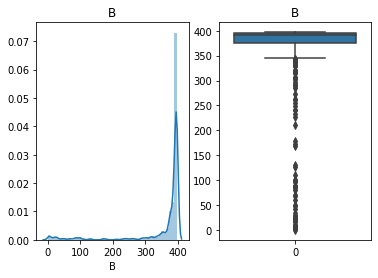

<Figure size 432x288 with 0 Axes>

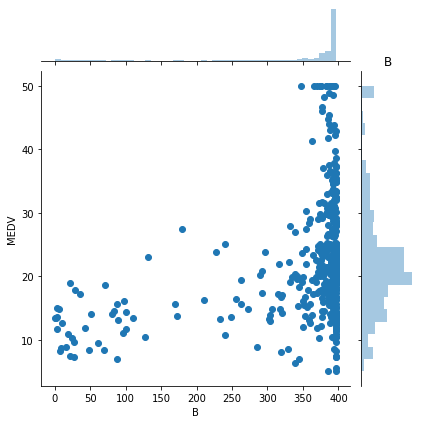

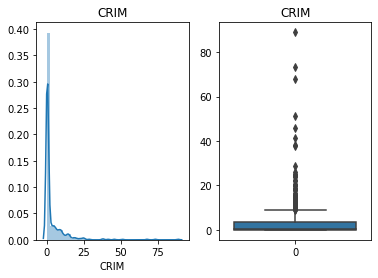

<Figure size 432x288 with 0 Axes>

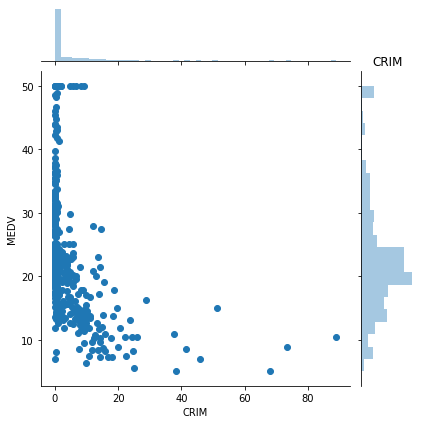

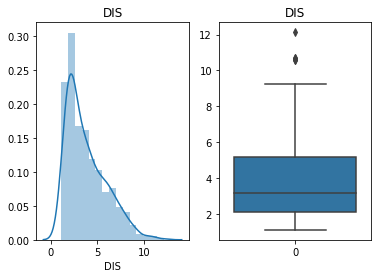

<Figure size 432x288 with 0 Axes>

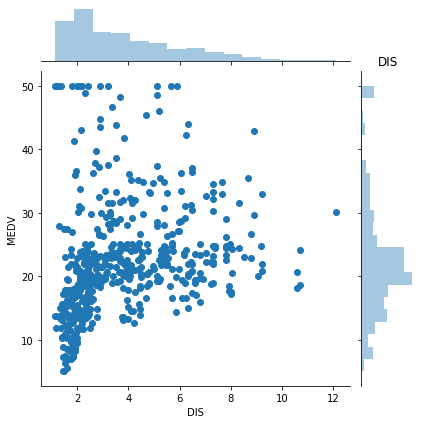

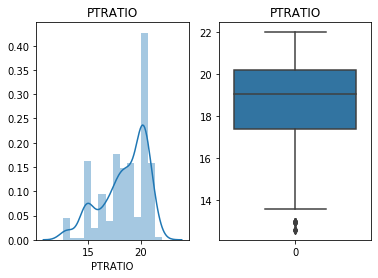

<Figure size 432x288 with 0 Axes>

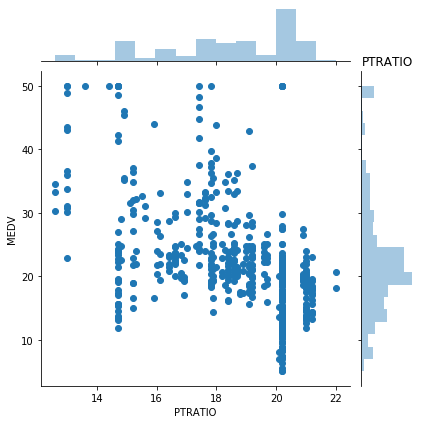

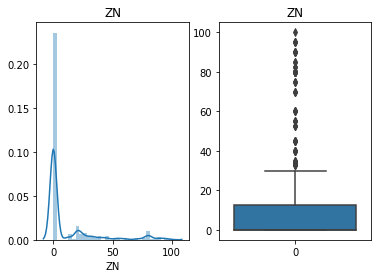

<Figure size 432x288 with 0 Axes>

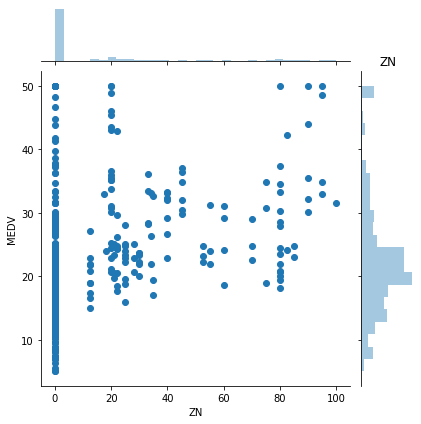

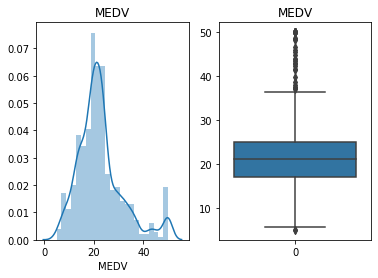

<Figure size 432x288 with 0 Axes>

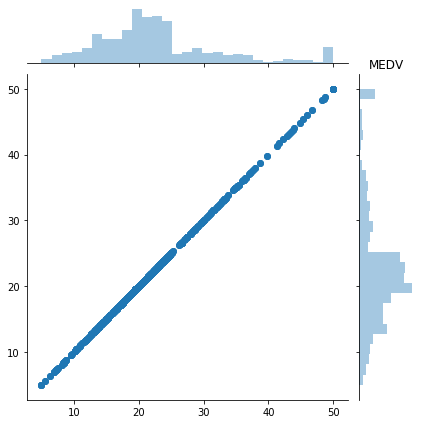

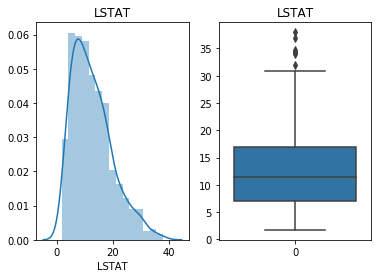

<Figure size 432x288 with 0 Axes>

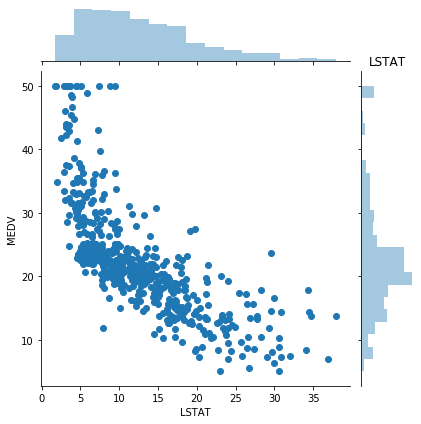

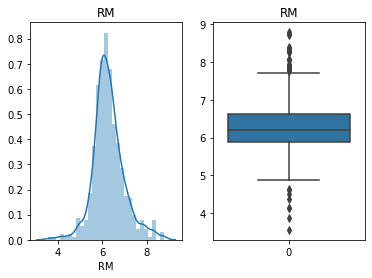

<Figure size 432x288 with 0 Axes>

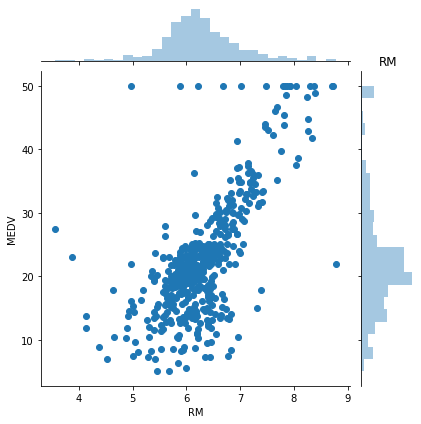

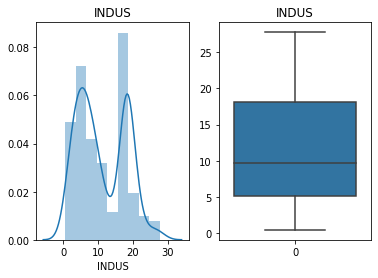

<Figure size 432x288 with 0 Axes>

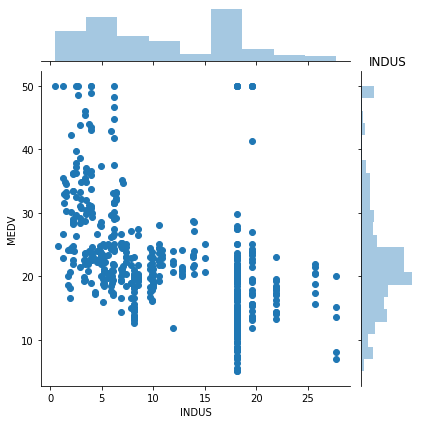

In [13]:
#Figure numeric variable
for col in numeric_variable:
    figure_analysis(housing_data[col], housing_data[target_variable], 'numeric')

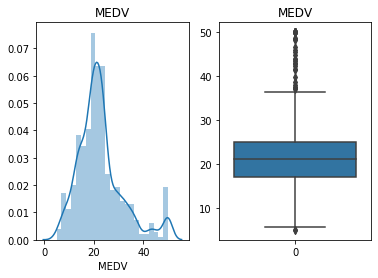

<Figure size 432x288 with 0 Axes>

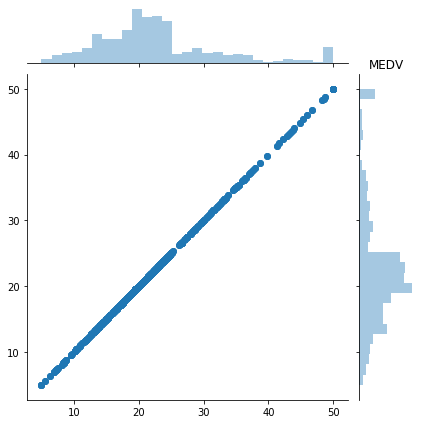

In [14]:
#Figure target variable
figure_analysis(housing_data[target_variable], housing_data[target_variable], 'numeric')

In [15]:
#Calculate correlation
corr = housing_data.corr(method = 'pearson')

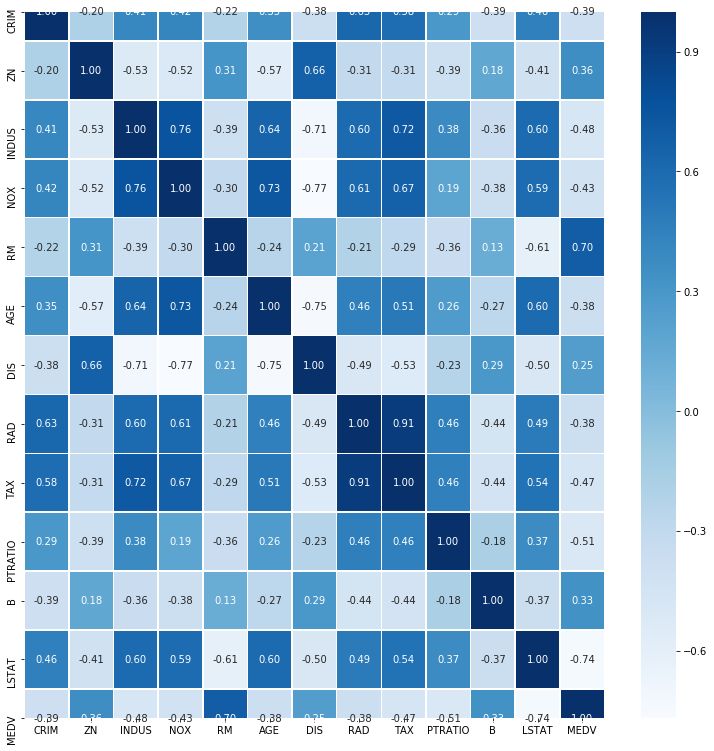

In [16]:
#Figure correlation heatmap
plt.figure(figsize=(len(corr.index), len(corr.columns)))
sns.heatmap(data = corr,annot= True,fmt = '.2f', linewidths = .5, cmap = 'Blues')
plt.savefig('graph\correlation.png')

In [17]:
#Calculate vif for checking multicollinearity
features = '+'.join(housing_data.columns[0:len(housing_data.columns)-1])
y,X = dmatrices('MEDV ~' + features, housing_data, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_FACTOR'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

VIF_FACTOR   features
0   585.265238  Intercept
1     1.073995  CHAS[T.1]
2     1.792192       CRIM
3     2.298758         ZN
4     3.991596      INDUS
5     4.393720        NOX
6     1.933744         RM
7     3.100826        AGE
8     3.955945        DIS
9     7.484496        RAD
10    9.008554        TAX
11    1.799084    PTRATIO
12    1.348521          B
13    2.941491      LSTAT

In [18]:
#Drop variable ('INDUS','RAD','TAX')
#housing_model_data = housing_data
housing_model_data = housing_data.drop(['ZN','RAD'],axis=1)


In [19]:
#Get model feature
X = housing_model_data[housing_model_data.columns[0:len(housing_model_data.columns)-1]]

In [20]:
#Get Target feature
y= housing_model_data[housing_model_data.columns[len(housing_model_data.columns)-1]]

In [21]:
#pca = PCA(n_components = 5)
#principalComponent = pca.fit_transform(X)
#X = pd.DataFrame(data = principalComponent, columns = ['p1','p2','p3','p4','p5'])

In [22]:
#Divide tranin, test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 0)

In [23]:
outlier_thrd =  X_train.mean()+3*X_train.std()

In [24]:
for col in X_train.columns:
    X_train.loc[X_train[col] > outlier_thrd[col],col] = outlier_thrd[col]
    X_test.loc[X_test[col] > outlier_thrd[col],col] = outlier_thrd[col]

C:\Users\stdrf\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
result_forecast=[]

In [26]:
#Transform standard scaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_std = standard_scaler.transform(X_train)
X_test_std = standard_scaler.transform(X_test)

In [27]:
#Set forecast model by random forest regression
model_random_forest = RandomForestRegressor(n_estimators = 500, criterion='mse', max_depth=10,random_state=0, oob_score = True)

In [28]:
#Train model
model_random_forest.fit(X_train_std, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

In [29]:
#Predict traning and test data by random forest
y_pred_train = pd.DataFrame(model_random_forest.predict(X_train_std))
y_pred_test = pd.DataFrame(model_random_forest.predict(X_test_std))

In [30]:
#Calcurate FunctionR square
def calculation_rsquare(actual_value, predict_value):
    mean_square = np.dot(np.array(actual_value-actual_value.mean()).transpose(),np.array(actual_value-actual_value.mean()))
    error_square = np.dot((np.array(actual_value)-np.array(predict_value)).transpose(),(np.array(actual_value)-predict_value))
    return 1-(error_square/mean_square)

In [31]:
#Calcurate R square by randomforest
score_random_forest_train = calculation_rsquare(pd.DataFrame(y_train), y_pred_train)
score_random_forest_test = calculation_rsquare(pd.DataFrame(y_test), y_pred_test)

In [32]:
#Merge R square by random forest
result_random_forest = np.append(score_random_forest_train,score_random_forest_test)

In [33]:
#Merge Forecast Value
y_pred_test.index = y_test.index.values
forecast_value = pd.concat([pd.DataFrame(y_test),y_pred_test],axis = 1)
forecast_value.columns = ['Actual', 'Random Forest']

In [34]:
#Calculate feature importances by random forest
feature_importances = pd.DataFrame(model_random_forest.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
feature_importances.to_csv('result\\feature_importances.csv')

         importance
RM         0.419560
LSTAT      0.414975
DIS        0.038983
CRIM       0.036164
PTRATIO    0.023729
TAX        0.017882
NOX        0.015597
AGE        0.012401
B          0.011186
INDUS      0.007898
CHAS       0.001625


In [35]:
#Set forecast model by decsion tree regression
model_decision_tree = DecisionTreeRegressor( criterion='mse', max_depth=10,random_state=0)

In [36]:
#Train model
model_decision_tree.fit(X_train_std, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [37]:
#Predict traning and test data by decsion tree
y_pred_train = pd.DataFrame(model_decision_tree.predict(X_train_std))
y_pred_test = pd.DataFrame(model_decision_tree.predict(X_test_std))


In [38]:
#Calcurate R square by decsion tree
score_decision_tree_train = calculation_rsquare(pd.DataFrame(y_train), y_pred_train)
score_decision_tree_test = calculation_rsquare(pd.DataFrame(y_test), y_pred_test)

In [39]:
#Merge R square by decsion tree
result_decision_tree = np.append(score_decision_tree_train,score_decision_tree_test)

In [40]:
#Merge Forecast result
result_forecast = np.vstack((result_random_forest,result_decision_tree))

In [41]:
#Merge Forecast Value
y_pred_test.index = y_test.index.values
y_pred_test.columns = ['Decision Tree']
forecast_value = pd.concat([forecast_value,y_pred_test],axis = 1)

In [42]:
#Set forecast model by Gradient Boosting Regression
model_gradient_boosting = GradientBoostingRegressor(n_estimators = 500, max_depth=10,random_state=0)

In [43]:
#Train model
model_gradient_boosting.fit(X_train_std, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [44]:
#Predict traning and test data by Gradient Boosting
y_pred_train = pd.DataFrame(model_gradient_boosting.predict(X_train_std))
y_pred_test = pd.DataFrame(model_gradient_boosting.predict(X_test_std))

In [45]:
#Calcurate R square by Gradient Boosting
score_gradient_boosting_train = calculation_rsquare(pd.DataFrame(y_train), y_pred_train)
score_gradient_boosting_test = calculation_rsquare(pd.DataFrame(y_test), y_pred_test)

In [46]:
#Merge R square by Gradient Boosting
result_gradient_boosting = np.append(score_gradient_boosting_train,score_gradient_boosting_test)

In [47]:
#Merge forecast result
result_forecast = np.vstack((result_forecast,result_gradient_boosting))

In [48]:
#Merge Forecast Value
y_pred_test.index = y_test.index.values
y_pred_test.columns = ['Gradient Boosting']
forecast_value = pd.concat([forecast_value,y_pred_test],axis = 1)

In [49]:
#Set function forecast model by Deep Neural Network 
def set_dnn():
    np.random.seed(0)
    model = models.Sequential()
    model.add(layers.Dense(128,activation='relu',input_shape=(X_train_std.shape[1],)))
    model.add(layers.Dense(128,activation='relu' ))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

In [50]:
#Set Deep neural network
model_deep_neural_network = set_dnn()

In [51]:
#Train model
model_deep_neural_network.fit(X_train_std, y_train, validation_split=0.2, epochs=200, batch_size=1)

Train on 283 samples, validate on 71 samples
Epoch 1/200
283/283 [==============================] - 1s 4ms/step - loss: 143.0794 - mse: 143.0794 - val_loss: 29.8939 - val_mse: 29.8939
Epoch 2/200
283/283 [==============================] - 1s 2ms/step - loss: 19.0473 - mse: 19.0473 - val_loss: 21.9091 - val_mse: 21.9091
Epoch 3/200
283/283 [==============================] - 1s 2ms/step - loss: 14.3332 - mse: 14.3332 - val_loss: 17.9023 - val_mse: 17.9023
Epoch 4/200
283/283 [==============================] - 1s 3ms/step - loss: 13.1473 - mse: 13.1473 - val_loss: 15.9352 - val_mse: 15.9352
Epoch 5/200
283/283 [==============================] - 1s 2ms/step - loss: 12.6055 - mse: 12.6055 - val_loss: 14.2262 - val_mse: 14.2262
Epoch 6/200
283/283 [==============================] - 1s 2ms/step - loss: 12.4429 - mse: 12.4429 - val_loss: 16.4300 - val_mse: 16.4300
Epoch 7/200
283/283 [==============================] - 1s 2ms/step - loss: 11.3720 - mse: 11.3720 - val_loss: 17.6397 - val_mse: 17

283/283 [==============================] - 1s 2ms/step - loss: 4.0317 - mse: 4.0317 - val_loss: 6.8065 - val_mse: 6.8065
Epoch 62/200
283/283 [==============================] - ETA: 0s - loss: 3.8302 - mse: 3.830 - 1s 2ms/step - loss: 3.9306 - mse: 3.9306 - val_loss: 8.5321 - val_mse: 8.5321
Epoch 63/200
283/283 [==============================] - 1s 2ms/step - loss: 4.0130 - mse: 4.0130 - val_loss: 7.5933 - val_mse: 7.5933
Epoch 64/200
283/283 [==============================] - 1s 2ms/step - loss: 3.7382 - mse: 3.7382 - val_loss: 14.9333 - val_mse: 14.9333
Epoch 65/200
283/283 [==============================] - 1s 3ms/step - loss: 3.7328 - mse: 3.7328 - val_loss: 10.7233 - val_mse: 10.7233
Epoch 66/200
283/283 [==============================] - 1s 2ms/step - loss: 3.7492 - mse: 3.7492 - val_loss: 7.5340 - val_mse: 7.5340
Epoch 67/200
283/283 [==============================] - 1s 2ms/step - loss: 3.4777 - mse: 3.4777 - val_loss: 9.5738 - val_mse: 9.5738
Epoch 68/200
283/283 [===========

283/283 [==============================] - 1s 2ms/step - loss: 2.3790 - mse: 2.3790 - val_loss: 6.5817 - val_mse: 6.5817
Epoch 122/200
283/283 [==============================] - 1s 2ms/step - loss: 2.3957 - mse: 2.3957 - val_loss: 7.9394 - val_mse: 7.9394
Epoch 123/200
283/283 [==============================] - 1s 2ms/step - loss: 2.3491 - mse: 2.3491 - val_loss: 6.8689 - val_mse: 6.8689
Epoch 124/200
283/283 [==============================] - 1s 2ms/step - loss: 2.0515 - mse: 2.0515 - val_loss: 7.4202 - val_mse: 7.4202
Epoch 125/200
283/283 [==============================] - 1s 2ms/step - loss: 2.3830 - mse: 2.3830 - val_loss: 7.8975 - val_mse: 7.8975
Epoch 126/200
283/283 [==============================] - 1s 2ms/step - loss: 2.3738 - mse: 2.3738 - val_loss: 12.1711 - val_mse: 12.1711
Epoch 127/200
283/283 [==============================] - 1s 3ms/step - loss: 2.2352 - mse: 2.2352 - val_loss: 8.5593 - val_mse: 8.5593
Epoch 128/200
283/283 [==============================] - 1s 2ms/ste

283/283 [==============================] - 1s 2ms/step - loss: 1.7205 - mse: 1.7205 - val_loss: 7.6676 - val_mse: 7.6676
Epoch 182/200
283/283 [==============================] - 1s 2ms/step - loss: 1.8645 - mse: 1.8645 - val_loss: 7.7622 - val_mse: 7.7622
Epoch 183/200
283/283 [==============================] - 1s 3ms/step - loss: 1.4752 - mse: 1.4752 - val_loss: 9.4058 - val_mse: 9.4058
Epoch 184/200
283/283 [==============================] - 1s 2ms/step - loss: 1.5793 - mse: 1.5793 - val_loss: 11.0882 - val_mse: 11.0882
Epoch 185/200
283/283 [==============================] - 1s 2ms/step - loss: 1.5818 - mse: 1.5818 - val_loss: 8.5483 - val_mse: 8.5483
Epoch 186/200
283/283 [==============================] - 1s 2ms/step - loss: 1.6624 - mse: 1.6624 - val_loss: 9.8595 - val_mse: 9.8595
Epoch 187/200
283/283 [==============================] - 1s 2ms/step - loss: 1.6404 - mse: 1.6404 - val_loss: 6.7781 - val_mse: 6.7781
Epoch 188/200
283/283 [==============================] - 1s 2ms/ste

In [52]:
#Predict traning and test data by DNN
y_pred_train = pd.DataFrame(model_deep_neural_network.predict(X_train_std))
y_pred_test = pd.DataFrame(model_deep_neural_network.predict(X_test_std))

In [53]:
#Calcurate R square by DNN
score_deep_neural_network_train = calculation_rsquare(pd.DataFrame(y_train), y_pred_train)
score_deep_neural_network_test = calculation_rsquare(pd.DataFrame(y_test), y_pred_test)

In [54]:
#Merge R square by Gradient Boosting
result_deep_neural_network = np.append(score_deep_neural_network_train,score_deep_neural_network_test)

In [55]:
result_forecast = np.vstack((result_forecast,result_deep_neural_network))

In [56]:
#Merge Forecast Value
y_pred_test.index = y_test.index.values
y_pred_test.columns = ['Deep Neural Network']
forecast_value = pd.concat([forecast_value,y_pred_test],axis = 1)

In [59]:
#Output Forecast Result
result_forecast = pd.DataFrame(result_forecast, columns = ['Train R Square', 'Test R Square'], index = ['Random Forest', 'Decision Tree', 'Gradient Boosting','Deep Neural Network'])
print(result_forecast)
result_forecast.to_csv('result\\forecast_result.csv')
forecast_value.to_csv('result\\forecast_value.csv')

                     Train R Square  Test R Square
Random Forest              0.982105       0.826112
Decision Tree              0.995387       0.678853
Gradient Boosting          1.000000       0.738009
Deep Neural Network        0.963847       0.789437
